In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the dataset
country_data_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data_df.shape #(167, 10)
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data_dict=pd.read_csv("data-dictionary+.csv", sep=",", encoding="ISO-8859-1", header=0)
data_dict

,ï»¿Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
# missing values
country_data_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### looking at key attributes gdpp, child_mort and income 
-converting inflation column to decimal

-converting income to common sized gdpp & accounting for inflation 

In [6]:
country_data_df['inflation']=((country_data_df['inflation'])/100) 

In [7]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,0.0944,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,0.0449,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,0.1610,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,0.2240,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,0.0144,76.8,2.13,12200


In [8]:
country_data_df['income']=(country_data_df['income'])*(1-country_data_df['inflation'])

In [9]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1458.016,0.0944,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9484.143,0.0449,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,10823.100,0.1610,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,4578.400,0.2240,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,18824.960,0.0144,76.8,2.13,12200


#### accounting for life expectancy and mortality 

In [10]:
country_data_df['child_mort']=(country_data_df['child_mort']/10)/100 #converting to decimal 
country_data_df['life_expec']=country_data_df['life_expec']*(1-country_data_df['child_mort'])

In [11]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.0902,10.0,7.58,44.9,1458.016,0.0944,51.13076,5.82,553
1,Albania,0.0166,28.0,6.55,48.6,9484.143,0.0449,75.03342,1.65,4090
2,Algeria,0.0273,38.4,4.17,31.4,10823.100,0.1610,74.41155,2.89,4460
3,Angola,0.1190,62.3,2.85,42.9,4578.400,0.2240,52.94810,6.16,3530
4,Antigua and Barbuda,0.0103,45.5,6.03,58.9,18824.960,0.0144,76.00896,2.13,12200


#### accounting for net exports and imports after converting to integer values 

In [12]:
country_data_df['exports']=country_data_df['exports']/100
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.0902,0.100,7.58,44.9,1458.016,0.0944,51.13076,5.82,553
1,Albania,0.0166,0.280,6.55,48.6,9484.143,0.0449,75.03342,1.65,4090
2,Algeria,0.0273,0.384,4.17,31.4,10823.100,0.1610,74.41155,2.89,4460
3,Angola,0.1190,0.623,2.85,42.9,4578.400,0.2240,52.94810,6.16,3530
4,Antigua and Barbuda,0.0103,0.455,6.03,58.9,18824.960,0.0144,76.00896,2.13,12200


In [13]:
country_data_df['imports']=country_data_df['imports']/100
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.0902,0.100,7.58,0.449,1458.016,0.0944,51.13076,5.82,553
1,Albania,0.0166,0.280,6.55,0.486,9484.143,0.0449,75.03342,1.65,4090
2,Algeria,0.0273,0.384,4.17,0.314,10823.100,0.1610,74.41155,2.89,4460
3,Angola,0.1190,0.623,2.85,0.429,4578.400,0.2240,52.94810,6.16,3530
4,Antigua and Barbuda,0.0103,0.455,6.03,0.589,18824.960,0.0144,76.00896,2.13,12200


In [14]:
country_data_df['NetXM']=(country_data_df['exports'])-(country_data_df['imports'])

In [15]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,NetXM
0,Afghanistan,0.0902,0.100,7.58,0.449,1458.016,0.0944,51.13076,5.82,553,-0.349
1,Albania,0.0166,0.280,6.55,0.486,9484.143,0.0449,75.03342,1.65,4090,-0.206
2,Algeria,0.0273,0.384,4.17,0.314,10823.100,0.1610,74.41155,2.89,4460,0.070
3,Angola,0.1190,0.623,2.85,0.429,4578.400,0.2240,52.94810,6.16,3530,0.194
4,Antigua and Barbuda,0.0103,0.455,6.03,0.589,18824.960,0.0144,76.00896,2.13,12200,-0.134


## thus after ajustment we can stick to 
-income

-gdpp

-life_expec (adjusted for infant mortaility) 

-NetXM

#### the key idea is to create metrics that are vital to the analysis and whose optimal values all should be max or min accordingly 


In [16]:
c_df1_postEDA=country_data_df.drop(columns=['child_mort','exports','health','imports','inflation','total_fer'])

In [17]:
c_df1_postEDA.isnull().sum()

country       0
income        0
life_expec    0
gdpp          0
NetXM         0
dtype: int64

In [18]:
c_df1_postEDA.columns

Index(['country', 'income', 'life_expec', 'gdpp', 'NetXM'], dtype='object')

### checking for outliers 

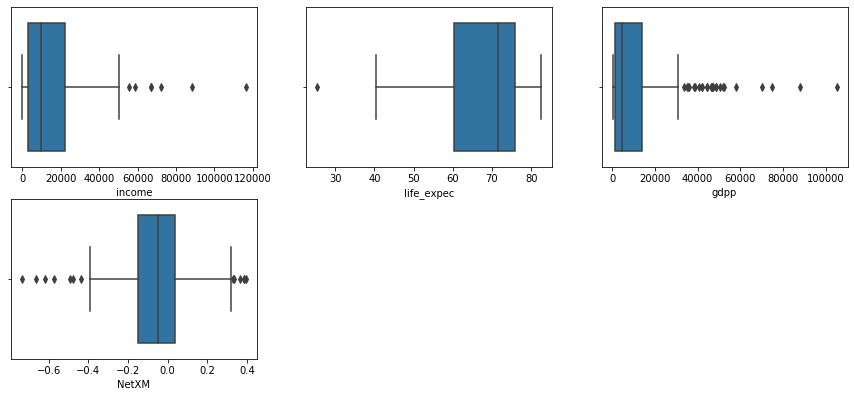

In [19]:
f = c_df1_postEDA.columns[1:]
plt.figure(figsize = (15,10))
for i in enumerate (f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = c_df1_postEDA)

### applying soft capping to the outlier values 

In [20]:
atrr_coun=['income', 'life_expec', 'gdpp', 'NetXM']

In [21]:
for i in atrr_coun:
    q1=c_df1_postEDA[i].quantile(0.01)
    q4=c_df1_postEDA[i].quantile(0.99)
    df=c_df1_postEDA[(c_df1_postEDA[i]>=q1) & (c_df1_postEDA[i]<=q4)]

In [22]:
c_df1_postEDA.head()

,country,income,life_expec,gdpp,NetXM
0,Afghanistan,1458.016,51.13076,553,-0.349
1,Albania,9484.143,75.03342,4090,-0.206
2,Algeria,10823.100,74.41155,4460,0.070
3,Angola,4578.400,52.94810,3530,0.194
4,Antigua and Barbuda,18824.960,76.00896,12200,-0.134


# scaling the df 

In [23]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
scaly=StandardScaler()

In [25]:
df_post_scaled=scaly.fit_transform(c_df1_postEDA.drop('country',axis=1))

In [26]:
df_post_scaled=pd.DataFrame(df_post_scaled) #converting back to df 

In [27]:
df_post_scaled.head()  #scaled data 

,0,1,2,3
0,-0.804570,-1.582700,-0.679180,-1.541835
1,-0.363834,0.637301,-0.485623,-0.784652
2,-0.290308,0.579544,-0.465376,0.676765
3,-0.633222,-1.413911,-0.516268,1.333344
4,0.149096,0.727906,-0.041817,-0.403413


In [28]:
#getting the column names again 
df_post_scaled.columns = c_df1_postEDA.columns[1:]
df_post_scaled.head()

,income,life_expec,gdpp,NetXM
0,-0.804570,-1.582700,-0.679180,-1.541835
1,-0.363834,0.637301,-0.485623,-0.784652
2,-0.290308,0.579544,-0.465376,0.676765
3,-0.633222,-1.413911,-0.516268,1.333344
4,0.149096,0.727906,-0.041817,-0.403413


### running a hopkins analysis  to determine whether or not the given data-set contains clusters 

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H



In [30]:
hopkins(df_post_scaled)

0.9296734943688343

# since closer to 1 means the higher the likelihood of clusters, we can continue with silhouette and elbow analysis 

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6,7,8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_post_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_post_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.48435150464332777
For n_clusters=3, the silhouette score is 0.3732502512967171
For n_clusters=4, the silhouette score is 0.371989480052135
For n_clusters=5, the silhouette score is 0.37483199430542785
For n_clusters=6, the silhouette score is 0.373363372335305
For n_clusters=7, the silhouette score is 0.3315754582109092
For n_clusters=8, the silhouette score is 0.3599023791766998


### continuing to elbow curve analysis since the above reading is inconclusive for clusters 3 to 5 
  

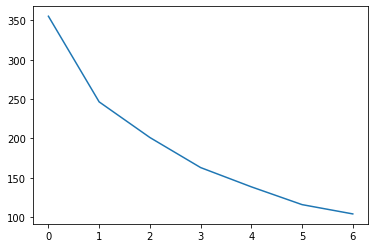

In [32]:
# elbow-curve analysis for optimal K
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_post_scaled)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

### so we can use 3 = k as the point to continue analysis 

In [33]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_post_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [35]:
c_df1_postEDA.head()  #assign lanbels to orig df 

,country,income,life_expec,gdpp,NetXM
0,Afghanistan,1458.016,51.13076,553,-0.349
1,Albania,9484.143,75.03342,4090,-0.206
2,Algeria,10823.100,74.41155,4460,0.070
3,Angola,4578.400,52.94810,3530,0.194
4,Antigua and Barbuda,18824.960,76.00896,12200,-0.134


In [36]:
c_df1_postEDA['Kmeans_labels']=kmeans.labels_

In [37]:
c_df1_postEDA.isnull().sum()

country          0
income           0
life_expec       0
gdpp             0
NetXM            0
Kmeans_labels    0
dtype: int64

### profiling the clusters 

In [38]:
c_df1_postEDA.Kmeans_labels.value_counts()

1    80
0    56
2    31
Name: Kmeans_labels, dtype: int64

In [39]:
c_df1_postEDA.head()

,country,income,life_expec,gdpp,NetXM,Kmeans_labels
0,Afghanistan,1458.016,51.13076,553,-0.349,0
1,Albania,9484.143,75.03342,4090,-0.206,1
2,Algeria,10823.100,74.41155,4460,0.070,1
3,Angola,4578.400,52.94810,3530,0.194,0
4,Antigua and Barbuda,18824.960,76.00896,12200,-0.134,1


In [40]:
c_df1_postEDA.groupby('Kmeans_labels')[['income','life_expec','gdpp','NetXM']].mean()

,income,life_expec,gdpp,NetXM
Kmeans_labels,,,,
0,2784.233420,56.276179,1580.857143,-0.203037
1,13360.136370,72.054378,8256.075000,-0.017670
2,47277.783161,79.640149,45677.419355,0.100935


### so we can see that cluster 2 seems to be the OECM or richer countries and cluster 0 seems to be the poorer countries 

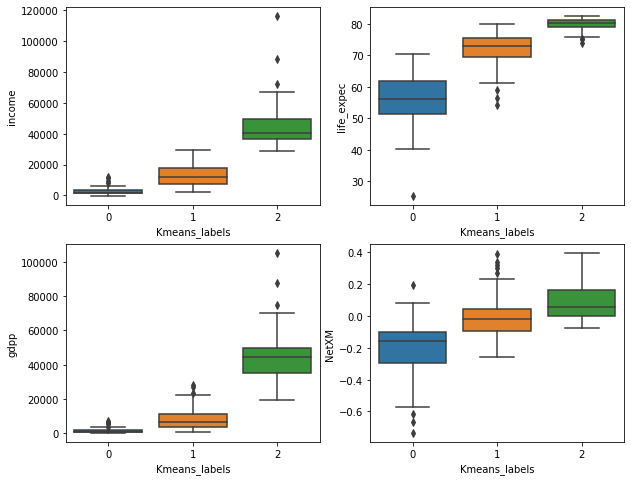

In [41]:
f1=['income','life_expec','gdpp','NetXM']

plt.figure(figsize = (10,8))
for i in enumerate (f1):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='Kmeans_labels',y = i[1], data = c_df1_postEDA)

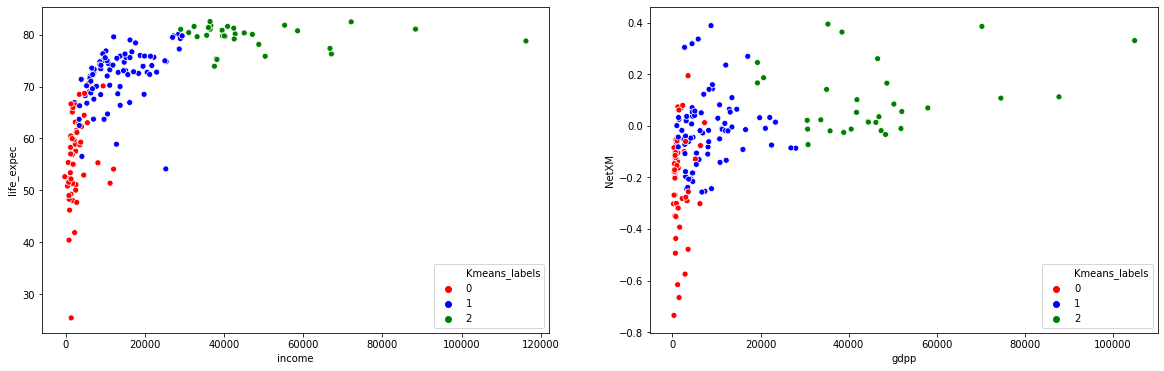

In [42]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='income',y='life_expec',data=c_df1_postEDA, hue='Kmeans_labels',palette=['red','blue','green'])
plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='NetXM',data=c_df1_postEDA, hue='Kmeans_labels',palette=['red','blue','green'])
plt.show()

## thus clearly we can see that cluster 0 has the most significant countries for this grant 
## moving to hierachical analysis 

In [43]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

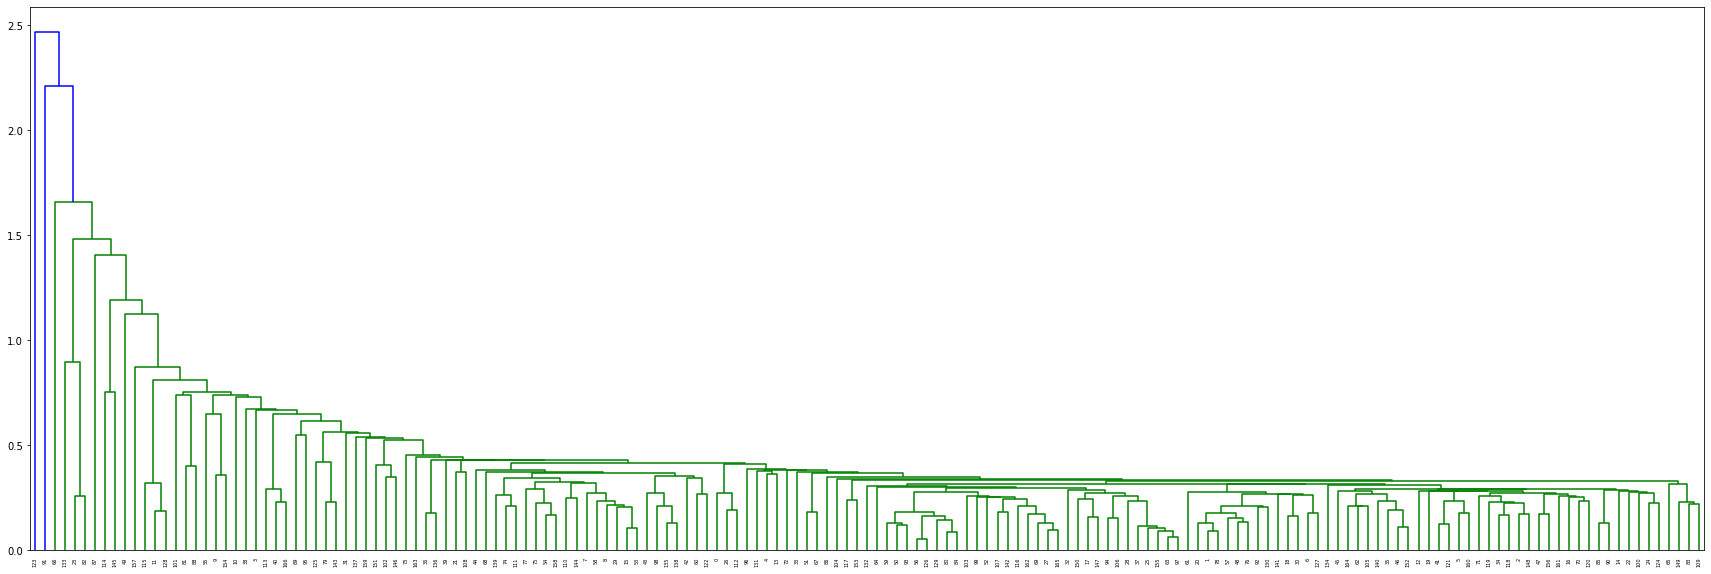

In [44]:
# single linkage
plt.figure(figsize=(30, 10))
mergings = linkage(df_post_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

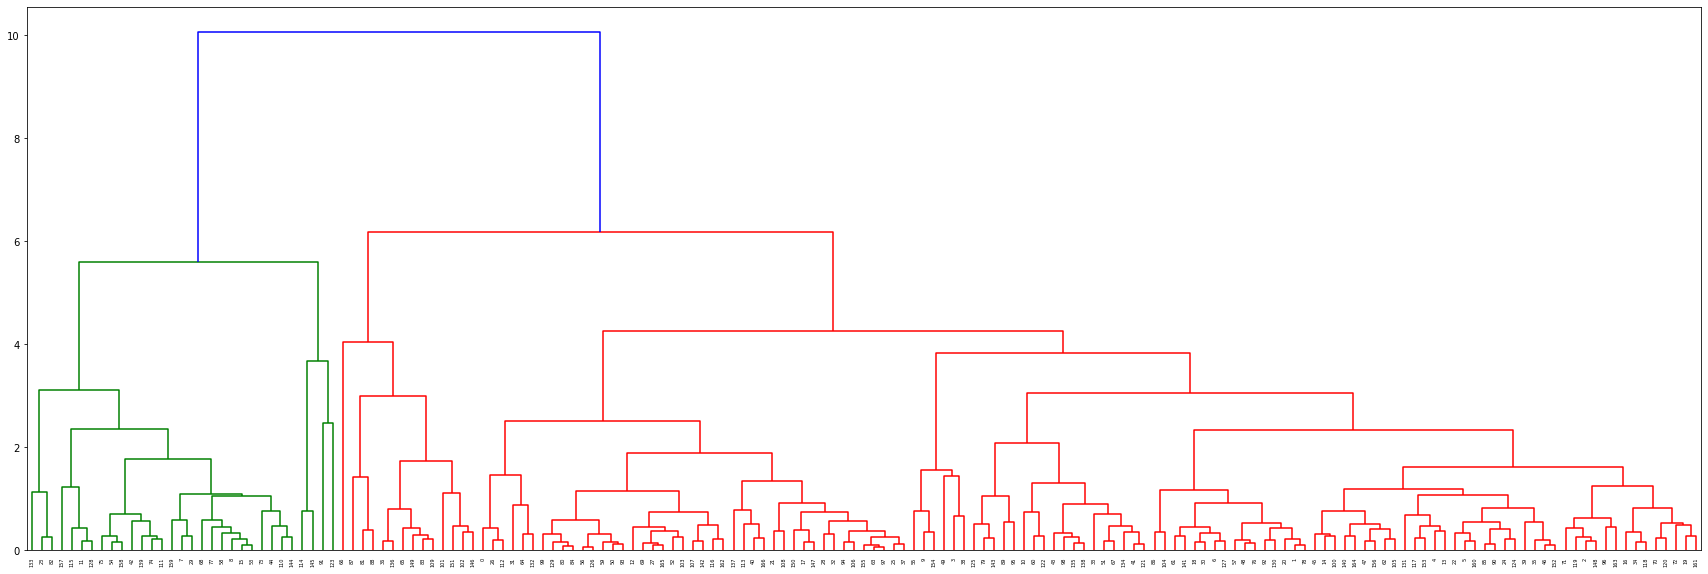

In [45]:
# complete linkage
plt.figure(figsize=(30, 10))
mergings = linkage(df_post_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# looking at 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2,
       2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels
c_df1_postEDA['HierachicalCluster_labels'] = cluster_labels
c_df1_postEDA.head()

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels
0,Afghanistan,1458.016,51.13076,553,-0.349,0,0
1,Albania,9484.143,75.03342,4090,-0.206,1,0
2,Algeria,10823.100,74.41155,4460,0.070,1,0
3,Angola,4578.400,52.94810,3530,0.194,0,0
4,Antigua and Barbuda,18824.960,76.00896,12200,-0.134,1,0


### profiling the Hierachical clusters 

In [48]:
c_df1_postEDA.HierachicalCluster_labels.value_counts()

0    122
1     27
2     14
3      4
Name: HierachicalCluster_labels, dtype: int64

In [49]:
c_df1_postEDA.groupby('HierachicalCluster_labels')[['income','life_expec','gdpp','NetXM']].mean()

,income,life_expec,gdpp,NetXM
HierachicalCluster_labels,,,,
0,9764.354001,66.303607,5954.229508,-0.054225
1,42482.911222,79.496921,39937.037037,0.081296
2,2391.199500,59.055441,1614.142857,-0.440586
3,79643.168750,80.606940,84425.000000,0.233500


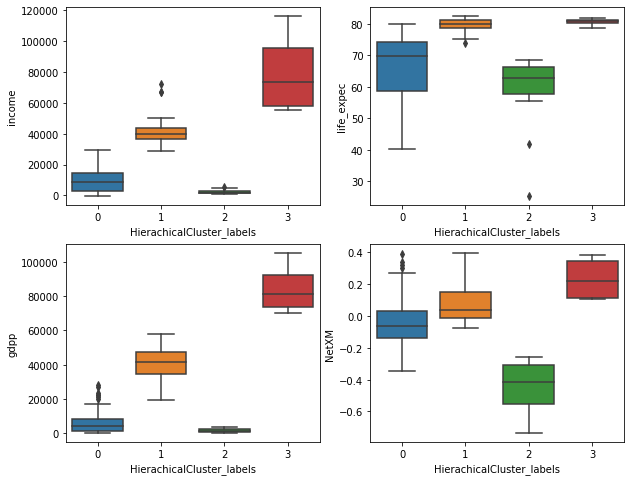

In [50]:
f2=['income','life_expec','gdpp','NetXM']

plt.figure(figsize = (10,8))
for i in enumerate (f2):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='HierachicalCluster_labels',y = i[1], data = c_df1_postEDA)

### thus clearly we can see that cluster 2 and cluster 0 has the most significant countries for this grant

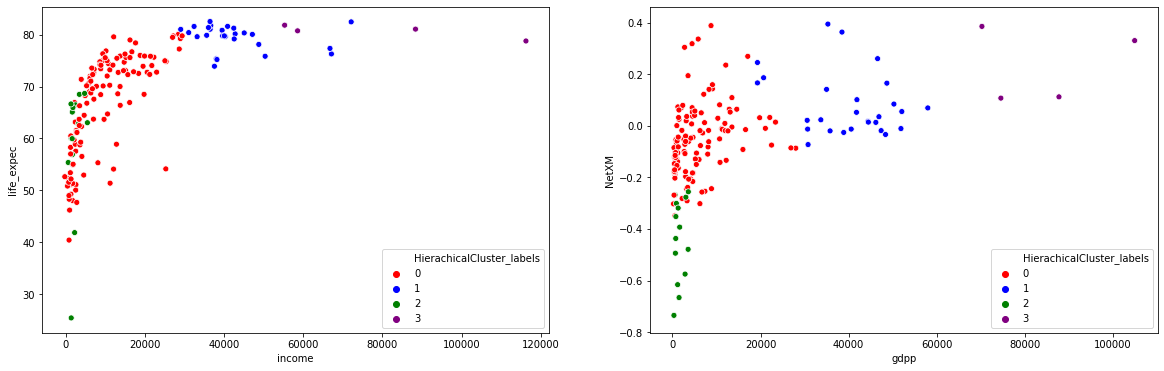

In [51]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='income',y='life_expec',data=c_df1_postEDA, hue='HierachicalCluster_labels',palette=['red','blue','green','purple'])
plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='NetXM',data=c_df1_postEDA, hue='HierachicalCluster_labels',palette=['red','blue','green','purple'])
plt.show()

In [52]:
#thus summariazing the top deserving countries 

c_df1_postEDA.groupby('HierachicalCluster_labels')[['country']].count(), c_df1_postEDA.groupby('Kmeans_labels')[['country']].count()



(                           country
 HierachicalCluster_labels         
 0                              122
 1                               27
 2                               14
 3                                4,
                country
 Kmeans_labels         
 0                   56
 1                   80
 2                   31)

In [53]:
hier_a=c_df1_postEDA['HierachicalCluster_labels']==2
hier_b=c_df1_postEDA['HierachicalCluster_labels']==0
kmns_a=c_df1_postEDA['Kmeans_labels']==0


#### hier_a CLUSTER2 - low income/wide life expectancy & low gdpp / wide netXM 
#### hier_b CLUSTER0 - low income/ very wide life expectancy & low gdpp / high netXM 
#### kmns_a CLUSTER0 - low income & low gdpp / wide netXM & life expectancy 

In [54]:
c_df1_postEDA.loc[hier_a & kmns_a]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels
36,Comoros,1355.433,60.08762,769,-0.3520,0,2
65,Guyana,5505.368,63.03720,3040,-0.2770,0,2
66,Haiti,1418.250,25.42320,662,-0.4940,0,2
81,Kiribati,1703.704,56.89411,1490,-0.6660,0,2
83,Kyrgyz Republic,2511.000,66.47240,880,-0.3010,0,2
87,Lesotho,2281.230,41.86395,1170,-0.6160,0,2
88,Liberia,661.710,55.37056,327,-0.7350,0,2
101,"Micronesia, Fed. Sts.",3213.080,62.78400,2860,-0.5750,0,2
102,Moldova,3475.990,68.50116,1630,-0.3930,0,2
109,Nepal,1689.510,65.08990,592,-0.2682,0,2


In [55]:
c_df1_postEDA.loc[hier_b & kmns_a]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels
0,Afghanistan,1458.0160,51.13076,553,-0.3490,0,0
3,Angola,4578.4000,52.94810,3530,0.1940,0,0
17,Benin,1803.8930,54.94020,758,-0.1340,0,0
18,Bhutan,6035.4420,69.02133,2180,-0.2820,0,0
21,Botswana,12113.6400,54.10225,6350,-0.0770,0,0
25,Burkina Faso,1332.6170,51.18360,575,-0.1040,0,0
26,Burundi,670.0280,52.29928,231,-0.3028,0,0
27,Cambodia,2441.3760,63.16516,786,-0.0540,0,0
28,Cameroon,2609.1940,51.11160,1310,-0.0480,0,0
30,Cape Verde,5800.5585,70.57875,3310,-0.2910,0,0


## to put this in perspective, we can add in the health spending per govt & sort to most deserving countries by least amount spent on health pc 

In [56]:
country_data_df.shape,c_df1_postEDA.shape

((167, 11), (167, 7))

In [57]:
c_df1_postEDA['healthpercapita']=((country_data_df['health'])/100) 

In [58]:
c_df1_postEDA.head()

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels,healthpercapita
0,Afghanistan,1458.016,51.13076,553,-0.349,0,0,0.0758
1,Albania,9484.143,75.03342,4090,-0.206,1,0,0.0655
2,Algeria,10823.100,74.41155,4460,0.070,1,0,0.0417
3,Angola,4578.400,52.94810,3530,0.194,0,0,0.0285
4,Antigua and Barbuda,18824.960,76.00896,12200,-0.134,1,0,0.0603


In [59]:
c_df1_postEDA.loc[hier_a & kmns_a ]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels,healthpercapita
36,Comoros,1355.433,60.08762,769,-0.3520,0,2,0.0451
65,Guyana,5505.368,63.03720,3040,-0.2770,0,2,0.0538
66,Haiti,1418.250,25.42320,662,-0.4940,0,2,0.0691
81,Kiribati,1703.704,56.89411,1490,-0.6660,0,2,0.1130
83,Kyrgyz Republic,2511.000,66.47240,880,-0.3010,0,2,0.0618
87,Lesotho,2281.230,41.86395,1170,-0.6160,0,2,0.1110
88,Liberia,661.710,55.37056,327,-0.7350,0,2,0.1180
101,"Micronesia, Fed. Sts.",3213.080,62.78400,2860,-0.5750,0,2,0.1420
102,Moldova,3475.990,68.50116,1630,-0.3930,0,2,0.1170
109,Nepal,1689.510,65.08990,592,-0.2682,0,2,0.0525


In [60]:
low_health_spending=c_df1_postEDA['healthpercapita']<c_df1_postEDA['healthpercapita'].quantile(0.10)


In [61]:
c_df1_postEDA.loc[low_health_spending]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels,healthpercapita
3,Angola,4578.400,52.94810,3530,0.194000,0,0,0.0285
12,Bangladesh,2265.784,66.92224,758,-0.058000,1,0,0.0352
23,Brunei,67139.800,76.29045,35300,0.394000,2,1,0.0284
38,"Congo, Rep.",4115.670,56.54044,2740,0.304000,1,0,0.0246
50,Eritrea,1255.280,58.29416,482,-0.185100,0,0,0.0266
55,Gabon,12843.600,58.89327,8750,0.388000,1,0,0.0350
70,Indonesia,7140.210,67.57233,3110,0.019000,1,0,0.0261
82,Kuwait,66777.600,77.35544,38500,0.363000,2,1,0.0263
107,Myanmar,3458.112,62.49808,988,0.000431,1,0,0.0197
115,Oman,38233.200,75.20963,19300,0.245000,2,1,0.0277


# top 12 countries in Hierachcical cluster 0 with low health spending 

In [62]:
c_df1_postEDA.loc[hier_b & low_health_spending]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels,healthpercapita
3,Angola,4578.400,52.94810,3530,0.194000,0,0,0.0285
12,Bangladesh,2265.784,66.92224,758,-0.058000,1,0,0.0352
38,"Congo, Rep.",4115.670,56.54044,2740,0.304000,1,0,0.0246
50,Eritrea,1255.280,58.29416,482,-0.185100,0,0,0.0266
55,Gabon,12843.600,58.89327,8750,0.388000,1,0,0.0350
70,Indonesia,7140.210,67.57233,3110,0.019000,1,0,0.0261
107,Myanmar,3458.112,62.49808,988,0.000431,1,0,0.0197
116,Pakistan,3813.480,59.28587,1040,-0.059000,0,0,0.0220
120,Philippines,5363.680,66.79890,2130,-0.018000,1,0,0.0361
131,Seychelles,21258.840,72.34304,10800,-0.142000,1,0,0.0340


# top 3 countries in Hierachcical cluster 0 & Kmeans cluster 0 with low health spending 

In [63]:
c_df1_postEDA.loc[kmns_a & hier_b & low_health_spending]

,country,income,life_expec,gdpp,NetXM,Kmeans_labels,HierachicalCluster_labels,healthpercapita
3,Angola,4578.40,52.94810,3530,0.1940,0,0,0.0285
50,Eritrea,1255.28,58.29416,482,-0.1851,0,0,0.0266
116,Pakistan,3813.48,59.28587,1040,-0.0590,0,0,0.0220


In [64]:
out12 = pd.DataFrame(c_df1_postEDA.loc[hier_b & low_health_spending])
out3 = pd.DataFrame(c_df1_postEDA.loc[kmns_a & hier_b & low_health_spending])
#df1.to_excel("output.xlsx")  

In [65]:
out12.to_excel("output12.xlsx")  
out3.to_excel("output3.xlsx")  